# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count= 0
set_one = 1

## Generate Cities List

In [30]:
# creating the lists to hold our lattiture or longitude
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# set lists for the dataframe
new_cities= []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temprature = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count = 0
set_one= 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        
        
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        
        max_temprature.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        
        
        if count_one > 48:
            count_one = 1
            set_one = set_one + 1
            new_cities.append(city)
        else:
            count_one = count_one+ 1
            new_cities.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
        
    except Exception:
       
    
     print("The city was not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 40 of Set 1 | lalmatie
Processing Record 41 of Set 1 | albany
Processing Record 42 of Set 1 | saskylakh
Processing Record 43 of Set 1 | hasaki
Processing Record 44 of Set 1 | mataura
Processing Record 45 of Set 1 | atuona
Processing Record 46 of Set 1 | champerico
Processing Record 47 of Set 1 | chokurdakh
Processing Record 48 of Set 1 | hobart
Processing Record 49 of Set 1 | golden
Processing Record 1 of Set 2 | komsomolskiy
Processing Record 2 of Set 2 | vila franca do campo
Processing Record 3 of Set 2 | geraldton
Processing Record 4 of Set 2 | rawson
Processing Record 5 of Set 2 | huntingdon
Processing Record 6 of Set 2 | punta arenas
The city was not found. Skipping...
Processing Record 7 of Set 2 | qaqortoq
Processing Record 8 of Set 2 | qaanaaq
Processing Record 9 of Set 2 | marienburg
Processing Record 10 of Set 2 | kodiak
Processing Record 11 of Set 2 | georgetown
Processing Record 12 of Set 2 | jamestown
Processing Record 13 of Set 2 | east london
The city w

Processing Record 26 of Set 5 | lanzhou
Processing Record 27 of Set 5 | halifax
Processing Record 28 of Set 5 | oistins
Processing Record 29 of Set 5 | felanitx
Processing Record 30 of Set 5 | deputatskiy
Processing Record 31 of Set 5 | sorong
Processing Record 32 of Set 5 | puro
Processing Record 33 of Set 5 | chuy
Processing Record 34 of Set 5 | kahului
Processing Record 35 of Set 5 | norman wells
Processing Record 36 of Set 5 | safranbolu
Processing Record 37 of Set 5 | porto novo
Processing Record 38 of Set 5 | yarada
The city was not found. Skipping...
Processing Record 39 of Set 5 | riverton
Processing Record 40 of Set 5 | pasni
The city was not found. Skipping...
Processing Record 41 of Set 5 | manta
Processing Record 42 of Set 5 | waingapu
Processing Record 43 of Set 5 | zaysan
The city was not found. Skipping...
Processing Record 44 of Set 5 | lagoa
Processing Record 45 of Set 5 | touros
Processing Record 46 of Set 5 | tasiilaq
Processing Record 47 of Set 5 | udachnyy
Processi

Processing Record 13 of Set 9 | kansk
Processing Record 14 of Set 9 | skibbereen
Processing Record 15 of Set 9 | jackson
The city was not found. Skipping...
Processing Record 16 of Set 9 | nuuk
Processing Record 17 of Set 9 | ouallam
Processing Record 18 of Set 9 | araceli
The city was not found. Skipping...
Processing Record 19 of Set 9 | san cristobal
Processing Record 20 of Set 9 | port hardy
The city was not found. Skipping...
Processing Record 21 of Set 9 | poya
Processing Record 22 of Set 9 | robe
Processing Record 23 of Set 9 | mumford
Processing Record 24 of Set 9 | behshahr
Processing Record 25 of Set 9 | mawlaik
Processing Record 26 of Set 9 | acworth
Processing Record 27 of Set 9 | eureka
Processing Record 28 of Set 9 | iquitos
Processing Record 29 of Set 9 | shache
Processing Record 30 of Set 9 | pemba
Processing Record 31 of Set 9 | castellarano
Processing Record 32 of Set 9 | iberia
Processing Record 33 of Set 9 | najran
Processing Record 34 of Set 9 | ipixuna
Processing 

Processing Record 37 of Set 12 | pundaguitan
Processing Record 38 of Set 12 | san andres
Processing Record 39 of Set 12 | yamada
Processing Record 40 of Set 12 | shebunino
Processing Record 41 of Set 12 | mount pleasant
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather = {
    "City":new_cities,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temprature,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lalmatie,40,MU,1569624508,78,-20.19,57.66,71.60,12.75
1,albany,1,US,1569624381,52,42.65,-73.75,69.01,4.70
2,saskylakh,97,RU,1569624509,93,71.97,114.09,29.09,8.12
3,hasaki,75,JP,1569624509,94,35.73,140.83,68.00,2.24
4,mataura,100,NZ,1569624509,68,-46.19,168.86,59.00,11.01


In [5]:

weather_df.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [34]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

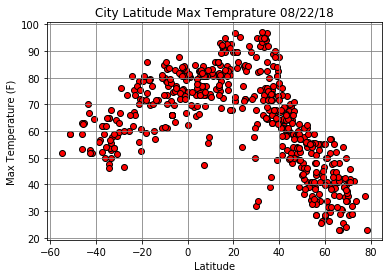

In [35]:

plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude Max Temprature 08/22/18")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure1.png")
plt.show()

#### Latitude vs. Humidity Plot

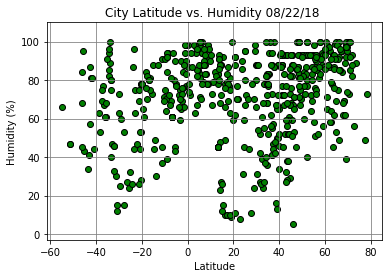

In [36]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity 08/22/18 ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-3,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

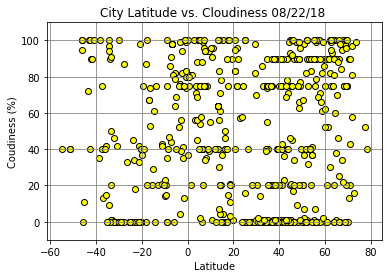

In [37]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Cloudiness 08/22/18 ")
plt.xlabel("Latitude")
plt.ylabel("Coudiness (%)")
plt.ylim(-10,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

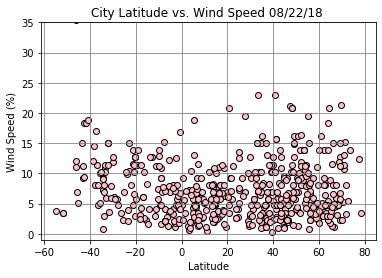

In [38]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="pink")
plt.title("City Latitude vs. Wind Speed 08/22/18 ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-1,35)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("Figures/figure4.png")
plt.show()

## Analysis

1. There is a correlation between the temprature and the city lattitude. 

2. The correlation between the city lattiture and the humidity is not that strong either.Although it is notable that there is a cluster of northern hemsphere cities that hold higher humidity.

3. No strong correlation has been detected between the city lattitude and level of cloudiness but we can see there is a notable amount of cities near the 0 and 90 % cloudiness

4. It is notable that there is not a very strong relationship between the city lattiture and the speed of the wind. Also we can conclude that in the northen hemsphere there are some cities with more than 25 miles per hour of wind

5. Weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The Northern hemisphere has lower temprature comparing to the Southern Jemisphere at this time of year 